In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

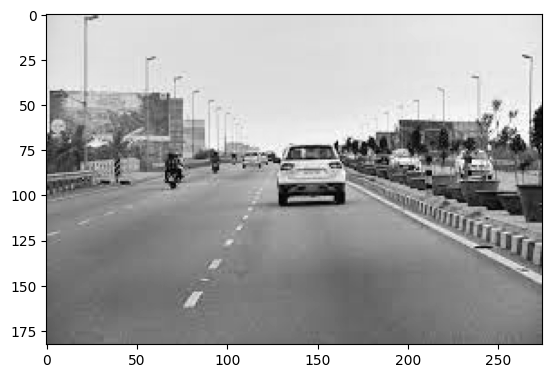

In [3]:
# Reading the image
img = cv2.imread('../.data/road-lane.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(img_gray, cmap="gray")
plt.show()

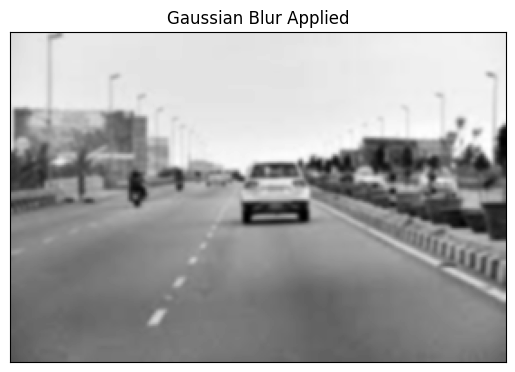

In [6]:
blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

plt.imshow(blur, cmap="gray")
plt.title("Gaussian Blur Applied")
plt.xticks([])
plt.yticks([])
plt.show()

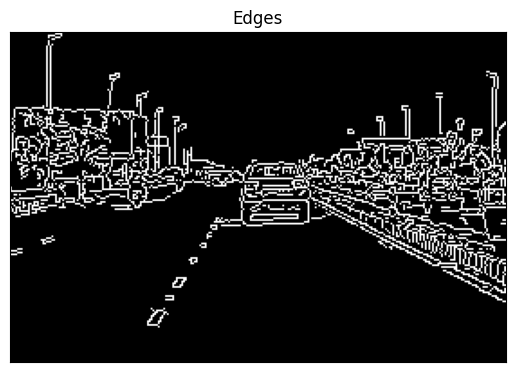

In [7]:
edges = cv2.Canny(img_gray, 100, 200)

plt.imshow(edges, cmap="gray")
plt.title("Edges")
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lower_yellow = np.array([20, 100, 100], dtype="uint8")
upper_yellow = np.array([30, 255, 255], dtype="uint8")

mask_yellow = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
mask_white = cv2.inRange(img_gray, 200, 255)
msk_yw = cv2.bitwise_or(mask_yellow, mask_white)
msk_yw_image = cv2.bitwise_and(img_gray, msk_yw)

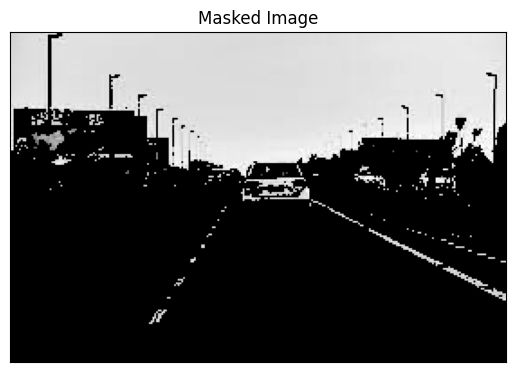

In [12]:
plt.imshow(msk_yw_image, cmap="gray")
plt.title("Masked Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
msk_yw_image.shape

(183, 275)

In [15]:
height, width = msk_yw_image.shape

In [18]:
triangle = np.array([
    [(100, height), (475, 325), (width, height)]
])

mask = np.zeros_like(msk_yw_image)
mask = cv2.fillPoly(mask, triangle, 255)
mask = cv2.bitwise_and(msk_yw_image, mask)

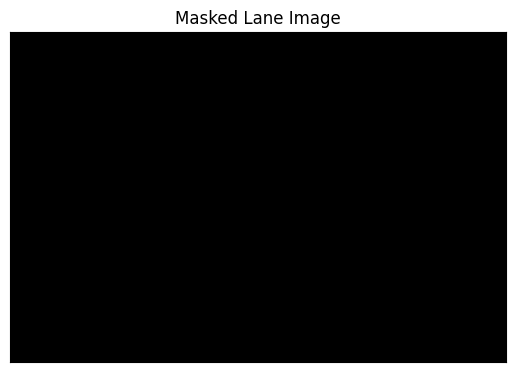

In [19]:
plt.imshow(mask, cmap="gray")
plt.title("Masked Lane Image")
plt.xticks([])
plt.yticks([])
plt.show()